In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/wsfish/glioblastoma/FISHspace/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
adata = sc.read_h5ad('../GBM_Linnarsson_EEL.h5ad')
#adata_tumor_sc.X = adata_tumor_sc.layers['smooth']

In [41]:
rename_dic = {
    'GW-like 5':'GW-like Endo.Ass.',
    'GW-like 2':'GW-like Periphery1',
    'GW-like 3':'GW-like Periphery2',
    'GW-like 1':'GW-like Periphery3',
    
    'GW-like 6':'GW-like HYPR2',
    'GW-like 8':'GW-like HYPR1',
    'GW-like 7':'GW-like OPC',
    'GW-like 4':'GW-like nIPC',
    
    #'nIPC-RG-like':'RG-like',
    
 
}

adata.obs['m-states3'] = pd.Categorical([rename_dic[m] if m in rename_dic else m for m in adata.obs['m-states2']])

In [42]:
adata_clusters = adata[adata.obs['m-states3'].isin([
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5','AC-like 6','AC-like 7',
    'GBL-like 1','GBL-like 2',
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'GW-like Endo.Ass.', 'GW-like Periphery1', 'GW-like Periphery2', 'GW-like Periphery3', 'GW-like HYPR1', 'GW-like HYPR2', 'GW-like OPC', 'GW-like nIPC',
    'nIPC-like 1', 'nIPC-like 2','nIPC-like 3', 
    'OPC-like 1', 'OPC-like 2', 
    'RG-like', 'nIPC-RG-like',
    'preOPC-like 1'])]
adata_clusters.raw = adata_clusters
#OPC = OPC[OPC.X.sum(axis=1) > 20]

In [43]:
FB2 = adata_clusters[adata_clusters.obs['m-states3'] == 'FB-like 2']
FB2 = FB2[:,FB2.var_names.isin(
    [
    'EGFR','ETV1','EDNRB', 'CDK4','GLI1','MDM2','PDGFRA','SOX2','TCF7','RBP1','CNTN1','DLL3', 'TYMS', 'FOXM1', 'OLIG2','SOX10', 'EZH2', 
    'NES','BCAN','ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB', 'GCK', 'HES5', 'SPARCL1','CST3', 'AQP4', 'CLU','FABP7',
    'VEGFA', 'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5', 'SERPINE1', 'MGP', 'TIMP1','COL3A1','DCN','COL4A1'
    ]

    )
]
    

In [44]:
'''adata_clusters.X = adata_clusters.raw.X
sc.pp.normalize_total(adata_clusters, target_sum=1e3)
#sc.pp.log1p(adata_clusters)'''

'adata_clusters.X = adata_clusters.raw.X\nsc.pp.normalize_total(adata_clusters, target_sum=1e3)\n#sc.pp.log1p(adata_clusters)'

In [45]:
adata.obs['m-states3'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'Astrocyte', 'DC', 'Endothelial 1',
       'Erythrocyte 1', 'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1',
       'GBL-like 2', 'GW-like Endo.Ass.', 'GW-like HYPR1', 'GW-like HYPR2',
       'GW-like OPC', 'GW-like Periphery1', 'GW-like Periphery2',
       'GW-like Periphery3', 'GW-like nIPC', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

In [46]:
row_order =[ 
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'GW-like Endo.Ass.', 'GW-like Periphery1', 'GW-like Periphery2', 'GW-like Periphery3', 'GW-like OPC', 'GW-like nIPC','GW-like HYPR1', 'GW-like HYPR2',
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5', 'AC-like 6','AC-like 7',
    'nIPC-like 1','nIPC-like 2','nIPC-like 3',
    'OPC-like 2','OPC-like 1',
    'RG-like', 'nIPC-RG-like',
    'GBL-like 1', 'GBL-like 2',
    'preOPC-like 1', 
       ]

In [47]:
'''markers_preOPC = ['EGFR', 'BCAN', 'TNC',]
markers_OPC = ['OLIG2','PDGFRA','SOX5','SOX10','PTPRZ1','S100B','DLL3']
markers_Ast = ['ITM2C','AQP4','HOPX','FABP7','CLU','HES5','PTN','CST3','SPON1','SPARCL1','GCK','CSPG5','CRYAB']
markers_MES = ['VEGFA','LGALS1','LGALS3', 'SERPINE1','GAP43','VIM','IGFBP5', 'ANXA1','EPAS1', 'HIF1A','MGP']
markers_RG = ['SOX2','NES','TYMS','FOXM1','EZH2','C1orf61','GLI1','RPL13A']
markers_NPC = ['CDK4', 'MDM4','NEUROG2']
markers_FB = ['TIMP1', 'COL3A1']
markers_GBL = ['EDNRB']

col_order = [
    'EGFR','ETV1',
    'EDNRB',
    
    'CDK4','GLI1','MDM2','PDGFRA','SOX2','TCF7','RBP1','CNTN1','DLL3', 'TYMS', 'FOXM1', 'OLIG2','SOX10', 'EZH2', 
    'NES','BCAN','ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB', 'GCK', 'HES5', 'SPARCL1','CST3', 'AQP4', 'CLU','FABP7',
    
    'VEGFA', 'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5', 'SERPINE1', 'MGP', 'TIMP1','COL3A1',
]


markers = col_order#markers_preOPC + markers_OPC + markers_Ast + markers_RG  +markers_MES + markers_NPC + markers_GBL + markers_FB
     
df =sp.pl.dotplot_bgval(
    adata_clusters,
    col_order,
    cluster_key='m-states3',
    #minmax=True,
    min_cells=200,
    bgval=1,
    normalize_totals=False,
    minmax=False,
    size_factor=1500,
    figsize=(15,10),
    metric='correlation',
    row_order=row_order,
    col_order= col_order,
    ytick_rotation=0,
    reverse_rows=False,
    reverse_cols=False,
    save=True,
    savepath='figures/dotplotTumor.pdf'
)'''

"markers_preOPC = ['EGFR', 'BCAN', 'TNC',]\nmarkers_OPC = ['OLIG2','PDGFRA','SOX5','SOX10','PTPRZ1','S100B','DLL3']\nmarkers_Ast = ['ITM2C','AQP4','HOPX','FABP7','CLU','HES5','PTN','CST3','SPON1','SPARCL1','GCK','CSPG5','CRYAB']\nmarkers_MES = ['VEGFA','LGALS1','LGALS3', 'SERPINE1','GAP43','VIM','IGFBP5', 'ANXA1','EPAS1', 'HIF1A','MGP']\nmarkers_RG = ['SOX2','NES','TYMS','FOXM1','EZH2','C1orf61','GLI1','RPL13A']\nmarkers_NPC = ['CDK4', 'MDM4','NEUROG2']\nmarkers_FB = ['TIMP1', 'COL3A1']\nmarkers_GBL = ['EDNRB']\n\ncol_order = [\n    'EGFR','ETV1',\n    'EDNRB',\n    \n    'CDK4','GLI1','MDM2','PDGFRA','SOX2','TCF7','RBP1','CNTN1','DLL3', 'TYMS', 'FOXM1', 'OLIG2','SOX10', 'EZH2', \n    'NES','BCAN','ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB', 'GCK', 'HES5', 'SPARCL1','CST3', 'AQP4', 'CLU','FABP7',\n    \n    'VEGFA', 'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5', 'SERPINE1', 'MGP', 'TIMP1','COL3A1',\n]\n\n\nmarkers = col_order#markers_preOPC + markers_OPC + markers_Ast +

Index(['EGFR', 'ETV1', 'EDNRB', 'CDK4', 'GLI1', 'MDM2', 'PDGFRA', 'SOX2',
       'TCF7', 'RBP1', 'CNTN1', 'DLL3', 'TYMS', 'FOXM1', 'OLIG2', 'SOX10',
       'EZH2', 'NES', 'BCAN', 'ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB',
       'GCK', 'HES5', 'SPARCL1', 'CST3', 'AQP4', 'CLU', 'FABP7', 'VEGFA',
       'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5',
       'SERPINE1', 'MGP', 'TIMP1', 'COL3A1', 'DCN'],
      dtype='object')
Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'FB-like 1', 'FB-like 2', 'FB-like 3',
       'GBL-like 1', 'GBL-like 2', 'GW-like Endo.Ass.', 'GW-like HYPR1',
       'GW-like HYPR2', 'GW-like OPC', 'GW-like Periphery1',
       'GW-like Periphery2', 'GW-like Periphery3', 'GW-like nIPC',
       'OPC-like 1', 'OPC-like 2', 'RG-like', 'nIPC-RG-like', 'nIPC-like 1',
       'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1'],
      dtype='object')
<bound method NDFrame.head of                         EGFR

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 51 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'd', 'e', 'five', 'four', 'h', 'hyphen', 'i', 'k', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5

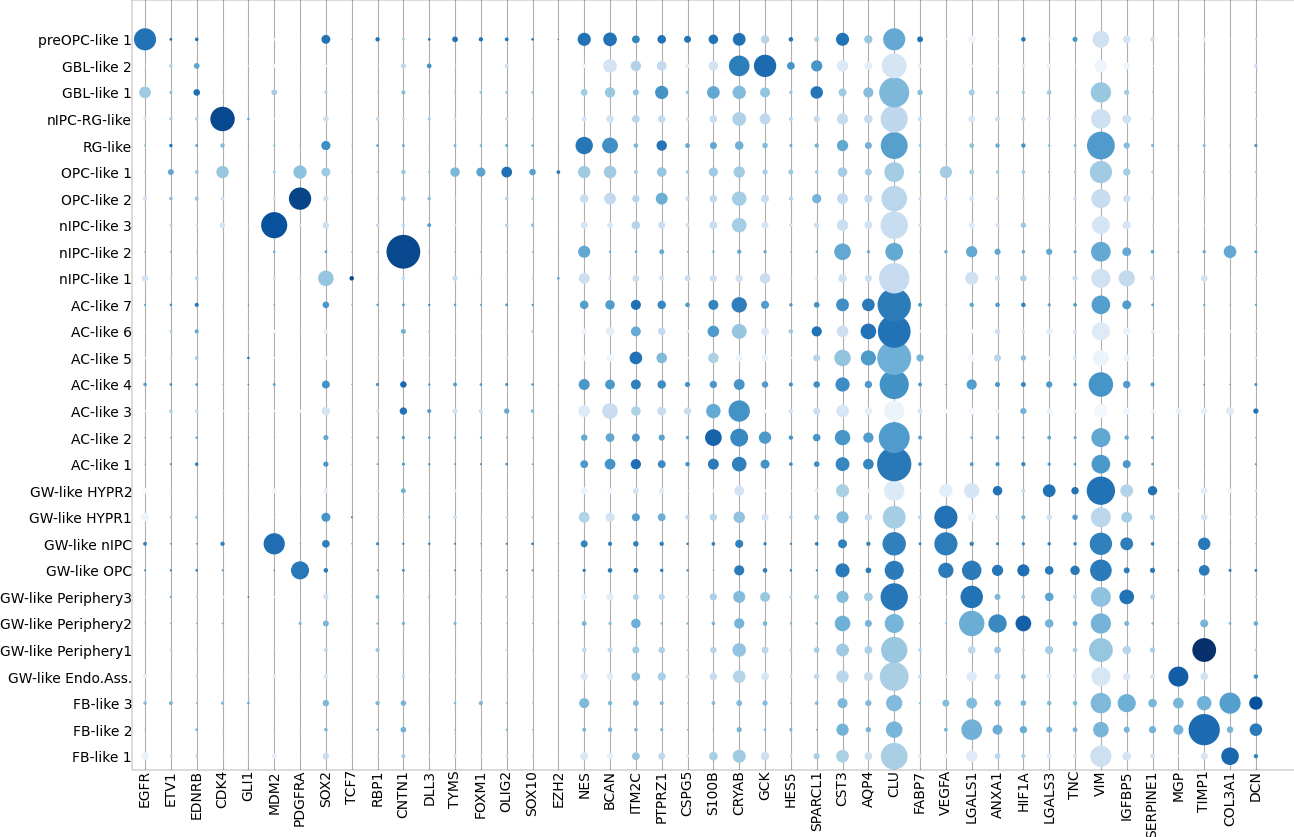

In [50]:
markers_preOPC = ['EGFR', 'BCAN', 'TNC',]
markers_OPC = ['OLIG2','PDGFRA','SOX5','SOX10','PTPRZ1','S100B','DLL3']
markers_Ast = ['ITM2C','AQP4','HOPX','FABP7','CLU','HES5','PTN','CST3','SPON1','SPARCL1','GCK','CSPG5','CRYAB']
markers_MES = ['VEGFA','LGALS1','LGALS3', 'SERPINE1','GAP43','VIM','IGFBP5', 'ANXA1','EPAS1', 'HIF1A','MGP']
markers_RG = ['SOX2','NES','TYMS','FOXM1','EZH2','C1orf61','GLI1','RPL13A']
markers_NPC = ['CDK4', 'MDM4','NEUROG2']
markers_FB = ['TIMP1', 'COL3A1']
markers_GBL = ['EDNRB']

col_order = [
    'EGFR','ETV1',
    'EDNRB',
    'CDK4','GLI1','MDM2','PDGFRA','SOX2','TCF7','RBP1','CNTN1','DLL3', 'TYMS', 'FOXM1', 'OLIG2','SOX10', 'EZH2', 
    'NES','BCAN','ITM2C', 'PTPRZ1', 'CSPG5', 'S100B', 'CRYAB', 'GCK', 'HES5', 'SPARCL1','CST3', 'AQP4', 'CLU','FABP7',
    'VEGFA', 'LGALS1', 'ANXA1', 'HIF1A', 'LGALS3', 'TNC', 'VIM', 'IGFBP5', 'SERPINE1', 'MGP', 'TIMP1','COL3A1','DCN',
]


markers = col_order#markers_preOPC + markers_OPC + markers_Ast + markers_RG  +markers_MES + markers_NPC + markers_GBL + markers_FB
     
df =sp.pl.dotplot_bgval(
    adata_clusters,
    col_order,
    cluster_key='m-states3',

    min_cells=200,
    bgval=1,
    max_quant=.99,
    normalize_totals=False,
    minmax=True,
    size_factor=1500,
    figsize=(15,10),
    metric='correlation',
    row_order=row_order,
    col_order= col_order,
    ytick_rotation=0,
    reverse_rows=False,
    reverse_cols=False,
    save=True,
    savepath='figures/dotplotTumor.pdf'
)